##### Global Power Plant Project

###### Import Libraries

In [571]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway
%matplotlib inline
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV,cross_val_score

from sklearn.linear_model import LinearRegression,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.metrics import mean_absolute_error, accuracy_score

import warnings
warnings.filterwarnings('ignore')

###### Load Dataset

In [576]:
pd.pandas.set_option('display.max_columns',None)
df=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')


###### Dimension of Dataset

In [577]:
df.shape

(908, 25)

*Observation :*<br>*Dataset have 908 rows and 25 columns*

###### Sample of Data

In [578]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


###### Brief Information About Data

In [579]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

*Observation :*<br>*Dataset have 13 float type columns and 12 object type columns*
<br>*most of the columns not have non-null values count 908. it means there are missing values*

###### Statistical Summary of data

###### ---For numerical variable

In [580]:
df.describe(exclude='object')

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,908.000000,862.000000,862.000000,0.0,528.000000,0.0,520.0,384.000000,401.000000,425.000000,437.000000,443.000000,0.0
mean,321.046378,21.196189,77.447848,NaN,1996.876894,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
std,580.221767,6.248627,4.907260,NaN,17.047817,NaN,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.837500,16.771575,74.258975,NaN,1988.000000,NaN,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170,NaN
50%,60.000000,21.778300,76.719250,NaN,2000.000000,NaN,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,NaN
75%,388.125000,25.516375,79.441475,NaN,2011.250000,NaN,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,NaN


###### ---For Categorical variable

In [581]:
df.describe(include=[object]) 

,country,country_long,name,gppd_idnr,primary_fuel,other_fuel1,other_fuel2,owner,source,url,geolocation_source,generation_data_source
count,908,908,908,908,908,199,1,342,908,908,889,450
unique,1,1,908,908,8,3,1,280,191,304,3,1
top,IND,India,UPPER SINDH I& II,IND0000205,Coal,Oil,Oil,Sterling Agro Industries ltd.,Central Electricity Authority,http://www.cea.nic.in/,WRI,Central Electricity Authority
freq,908,908,1,1,259,196,1,4,520,520,766,450


*Observation :*<br>*In statistical summary of dataset count is not 908 in most of the columns so there is missing values*
<br>*Std is greater than mean in capacity_mw,generation_gwh_2013-2014-2015-2016-2017 colmns*
<br>*min value is 0 and max value is very large*
<br>*in year_of_capacity_data column std is 0*
<br>*estimated_generation_gwh,wepp_id,other_fuel3 show all quartiles nan values*
<br>*so there are outlier and abnormalities in dataset*

###### Check for Unique value in Columns

In [582]:
df.nunique()

country                       1
country_long                  1
name                        908
gppd_idnr                   908
capacity_mw                 365
latitude                    837
longitude                   828
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013         364
generation_gwh_2014         374
generation_gwh_2015         398
generation_gwh_2016         405
generation_gwh_2017         410
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

*Observation :*<br>*all columns have coutinuous data except columns country,country_long,primary_fuel,*
<br>*other_fuel1,other_fuel2,geolocation_source,year_of_capacity_datageneration_data_source*
<br>*estimated_generation_gwh,wepp_id,other_fuel3 have 0 unique values it means there are empty*

###### Ckeck for MIssing Values in Columns

In [583]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [584]:
print("Total missing values :",df.isnull().sum().sum())

Total missing values : 8693


###### Total % missing values in Columns

In [585]:
print("Total % of MIssing Values in Columns :")
df.isnull().sum()/df.shape[0]*100 

Total % of MIssing Values in Columns :


country                       0.000000
country_long                  0.000000
name                          0.000000
gppd_idnr                     0.000000
capacity_mw                   0.000000
latitude                      5.066079
longitude                     5.066079
primary_fuel                  0.000000
other_fuel1                  78.083700
other_fuel2                  99.889868
other_fuel3                 100.000000
commissioning_year           41.850220
owner                        62.334802
source                        0.000000
url                           0.000000
geolocation_source            2.092511
wepp_id                     100.000000
year_of_capacity_data        42.731278
generation_gwh_2013          57.709251
generation_gwh_2014          55.837004
generation_gwh_2015          53.193833
generation_gwh_2016          51.872247
generation_gwh_2017          51.211454
generation_data_source       50.440529
estimated_generation_gwh    100.000000
dtype: float64

*Observation :*<br>*other_fuel1,commissioning_year,owner,year_of_capacity_data,generation_data_source,* 
<br>*generation_gwh_2013-2014-2015-2016-2017 columns have lost of missing values approx 50% or more missing values* <br>*wepp_id,estimated_generation_gwh,other_fuel3 100% missing values and other_fuel2 99% missing values*
<br>*latitude,longitude,geolocation_source columns have very few missing values*  

###### Duplicate Rows in Dataset

In [586]:
sum(df.duplicated())

0

*Observation :*<br>*No Duplicate rows*

###### Zeros as value in columns

In [587]:
print(df[df==0].count())
print('Total zeros in Dataset:', df[df==0].count().sum())

country                      0
country_long                 0
name                         0
gppd_idnr                    0
capacity_mw                  1
latitude                     0
longitude                    0
primary_fuel                 0
other_fuel1                  0
other_fuel2                  0
other_fuel3                  0
commissioning_year           0
owner                        0
source                       0
url                          0
geolocation_source           0
wepp_id                      0
year_of_capacity_data        0
generation_gwh_2013         21
generation_gwh_2014         28
generation_gwh_2015         28
generation_gwh_2016         31
generation_gwh_2017         33
generation_data_source       0
estimated_generation_gwh     0
dtype: int64
Total zeros in Dataset: 142


###### Total % of Zeros as value in Columns

In [588]:
print("Total % of Zeros as Value in Columns")
df[df==0].count()/df.shape[0]*100   

Total % of Zeros as Value in Columns


country                     0.000000
country_long                0.000000
name                        0.000000
gppd_idnr                   0.000000
capacity_mw                 0.110132
latitude                    0.000000
longitude                   0.000000
primary_fuel                0.000000
other_fuel1                 0.000000
other_fuel2                 0.000000
other_fuel3                 0.000000
commissioning_year          0.000000
owner                       0.000000
source                      0.000000
url                         0.000000
geolocation_source          0.000000
wepp_id                     0.000000
year_of_capacity_data       0.000000
generation_gwh_2013         2.312775
generation_gwh_2014         3.083700
generation_gwh_2015         3.083700
generation_gwh_2016         3.414097
generation_gwh_2017         3.634361
generation_data_source      0.000000
estimated_generation_gwh    0.000000
dtype: float64

*Observation :*<br>*generation_gwh_2013,-2014 -2015 2016 -2017 columns have 0 value data but it less than 4%*

###### Identification of Variables

###### Check for Numerical Variable

In [589]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))

Number of numerical variables:  13


In [590]:
for feature in numerical_features:
    print('The feature is {} and number of numerical are {}'.format(feature,len(df[feature].unique())))

The feature is capacity_mw and number of numerical are 365
The feature is latitude and number of numerical are 838
The feature is longitude and number of numerical are 829
The feature is other_fuel3 and number of numerical are 1
The feature is commissioning_year and number of numerical are 74
The feature is wepp_id and number of numerical are 1
The feature is year_of_capacity_data and number of numerical are 2
The feature is generation_gwh_2013 and number of numerical are 365
The feature is generation_gwh_2014 and number of numerical are 375
The feature is generation_gwh_2015 and number of numerical are 399
The feature is generation_gwh_2016 and number of numerical are 406
The feature is generation_gwh_2017 and number of numerical are 411
The feature is estimated_generation_gwh and number of numerical are 1


In [591]:
df[numerical_features].head()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
0,2.5,28.1839,73.2407,NaN,2011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,NaN,2004.0,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,NaN
4,1800.0,21.9603,82.4091,NaN,2015.0,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,NaN


###### ---Check for Date type variable

In [592]:
year_feature = [feature for feature in numerical_features if 'year' in feature]
print("Year Variables Count: {}".format(len(year_feature)),"\n")
print(year_feature,"\n")


for feature in year_feature:
    print('The feature is {} and number of numerical are {}'.format(feature,len(df[feature].unique())))

for feature in year_feature:
    print("\n",feature," : ", df[feature].unique())

Year Variables Count: 2 

['commissioning_year', 'year_of_capacity_data'] 

The feature is commissioning_year and number of numerical are 74
The feature is year_of_capacity_data and number of numerical are 2

 commissioning_year  :  [2011.   nan 2004. 2015. 2005. 1970. 2010. 2008. 2014. 1985. 1986. 1987.
 2000. 1989. 2017. 1998. 1977. 1980. 2003. 1984. 1973. 1996. 1991. 2002.
 2001. 2006. 2007. 1988. 2012. 1968. 1964. 2016. 2013. 1962. 1993. 1997.
 1999. 1994. 1975. 1992. 1972. 1979. 1967. 1995. 1983. 1981. 1959. 1961.
 1957. 1978. 1976. 1963. 1971. 1955. 2018. 2009. 1966. 1965. 1960. 1949.
 1952. 1990. 1982. 1937. 1956. 1946. 1958. 1943. 1954. 1969. 1939. 1927.
 1974. 1953.]

 year_of_capacity_data  :  [  nan 2018.]


In [593]:
df[year_feature].head()


,commissioning_year,year_of_capacity_data
0,2011.0,NaN
1,NaN,NaN
2,NaN,NaN
3,2004.0,2018.0
4,2015.0,2018.0


###### ---Check for Descrete type variable

In [594]:
descrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25 and feature not in year_feature]
print("Descrete Variables Count: {}".format(len(descrete_feature)),"\n")

for feature in descrete_feature:
    print('The feature is {} and number of numerical are {}'.format(feature,len(df[feature].unique())))
    
    
for feature in descrete_feature:
    print("\n",feature," : ", df[feature].unique())

Descrete Variables Count: 3 

The feature is other_fuel3 and number of numerical are 1
The feature is wepp_id and number of numerical are 1
The feature is estimated_generation_gwh and number of numerical are 1

 other_fuel3  :  [nan]

 wepp_id  :  [nan]

 estimated_generation_gwh  :  [nan]


In [595]:
df[descrete_feature].head()


,other_fuel3,wepp_id,estimated_generation_gwh
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


###### ---Check for Continuous type variable

In [596]:
continuous_feature=[feature for feature in numerical_features if feature not in descrete_feature + year_feature]
print("Continuous Variables Count {}".format(len(continuous_feature)),"\n")

for feature in continuous_feature:
    print('The feature is:  {}     and number of numerical are:  {}'.format(feature,len(df[feature].unique())))

Continuous Variables Count 8 

The feature is:  capacity_mw     and number of numerical are:  365
The feature is:  latitude     and number of numerical are:  838
The feature is:  longitude     and number of numerical are:  829
The feature is:  generation_gwh_2013     and number of numerical are:  365
The feature is:  generation_gwh_2014     and number of numerical are:  375
The feature is:  generation_gwh_2015     and number of numerical are:  399
The feature is:  generation_gwh_2016     and number of numerical are:  406
The feature is:  generation_gwh_2017     and number of numerical are:  411


In [597]:
df[continuous_feature].head()


,capacity_mw,latitude,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,631.777928,617.789264,843.747,886.004428,663.774500
4,1800.0,21.9603,82.4091,1668.290000,3035.550000,5916.370,6243.000000,5385.579736


###### Check for Categorical Variable

In [598]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
print('Number of Categorical variables: ', len(categorical_features))

Number of Categorical variables:  12


In [599]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is country and number of categories are 1
The feature is country_long and number of categories are 1
The feature is name and number of categories are 908
The feature is gppd_idnr and number of categories are 908
The feature is primary_fuel and number of categories are 8
The feature is other_fuel1 and number of categories are 4
The feature is other_fuel2 and number of categories are 2
The feature is owner and number of categories are 281
The feature is source and number of categories are 191
The feature is url and number of categories are 304
The feature is geolocation_source and number of categories are 4
The feature is generation_data_source and number of categories are 2


In [600]:
df[categorical_features].head()


,country,country_long,name,gppd_idnr,primary_fuel,other_fuel1,other_fuel2,owner,source,url,geolocation_source,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,Solar,NaN,NaN,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,Wind,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN
3,IND,India,AGARTALA GT,IND0000001,Gas,NaN,NaN,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,Coal,Oil,NaN,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,Central Electricity Authority


###### ---Check for Date type variable

In [601]:
date_feature = [feature for feature in categorical_features if 'Date' in feature]
date_feature

[]

###### ---Check for Binary type Variable

In [602]:
binary_feature=[feature for feature in categorical_features if len(df[feature].unique())==2 or len(df[feature].unique())<2 and feature not in date_feature]
print("Binary Variables Count: {}".format(len(binary_feature)))

Binary Variables Count: 4


In [603]:
for feature in binary_feature:
    print(feature," : ", df[feature].unique())

country  :  ['IND']
country_long  :  ['India']
other_fuel2  :  [nan 'Oil']
generation_data_source  :  [nan 'Central Electricity Authority']


In [604]:
df[binary_feature].head()

,country,country_long,other_fuel2,generation_data_source
0,IND,India,NaN,NaN
1,IND,India,NaN,NaN
2,IND,India,NaN,NaN
3,IND,India,NaN,Central Electricity Authority
4,IND,India,NaN,Central Electricity Authority


###### ---Check for Nominal type variable

In [605]:
nominal_feature=[feature for feature in categorical_features if feature not in binary_feature + date_feature]
print("Nominal feature Count {}".format(len(nominal_feature)))

Nominal feature Count 8


In [606]:
for feature in nominal_feature:
    print('The feature is {} and number of numerical are {}'.format(feature,len(df[feature].unique())))

The feature is name and number of numerical are 908
The feature is gppd_idnr and number of numerical are 908
The feature is primary_fuel and number of numerical are 8
The feature is other_fuel1 and number of numerical are 4
The feature is owner and number of numerical are 281
The feature is source and number of numerical are 191
The feature is url and number of numerical are 304
The feature is geolocation_source and number of numerical are 4


In [607]:
df[nominal_feature].head()

,name,gppd_idnr,primary_fuel,other_fuel1,owner,source,url,geolocation_source
0,ACME Solar Tower,WRI1020239,Solar,NaN,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory
1,ADITYA CEMENT WORKS,WRI1019881,Coal,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI
2,AES Saurashtra Windfarms,WRI1026669,Wind,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI
3,AGARTALA GT,IND0000001,Gas,NaN,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI
4,AKALTARA TPP,IND0000002,Coal,Oil,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI


*Observation :*<br>*capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,*
<br>*generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,*
<br>*estimated_generation_gwh columns are numerical variables*
<br>*in this commissioning_year,year_of_capacity_data columns are year type*
<br>*other_fuel3,wepp_id,estimated_generation_gwh columns are discrete type and rest are continuous  type*
<br>*there are country,country_long,name,gppd_idnr,primary_fuel,other_fuel1,other_fuel2,owner,source,url,*
<br>*geolocation_source,generation_data_source columns are categorical variables.*
<br>*In country,country_long,other_fuel2,generation_data_source columns ther are 2 or 1 value that why they
<br>*are binary type and rest are nominal

###### Check for Cardinality

###### ---In Categorical variable

Text(0.5, 1.0, 'Cardinality')

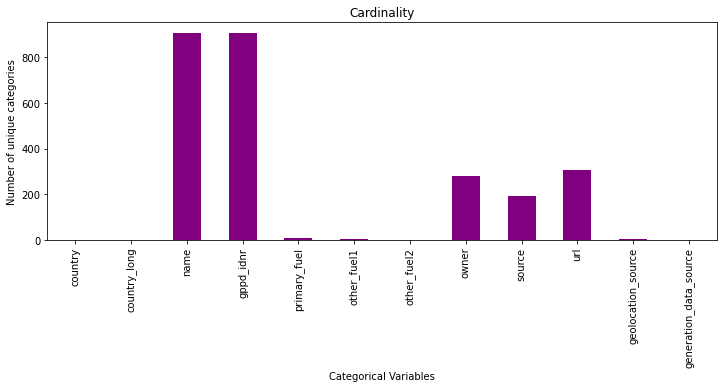

In [608]:
df[categorical_features].nunique().plot.bar(figsize=(12,4),color='purple')
plt.ylabel('Number of unique categories')
plt.xlabel('Categorical Variables')
plt.title('Cardinality')

*Observation :*<br>*name,gppd_idnr,owner,source,url colmn have high cardinality*

###### Check for Outliers

###### ---Numerical variable

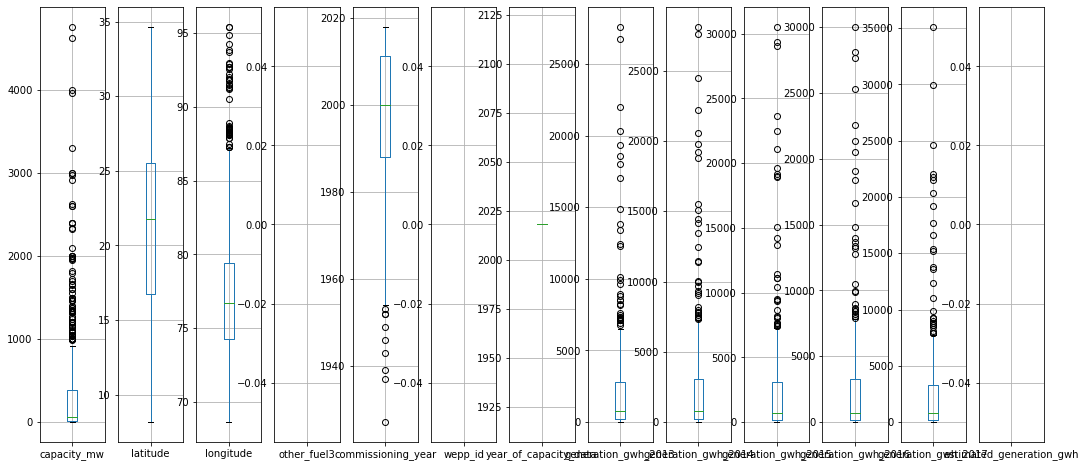

In [609]:
fig, pltcan=plt.subplots(nrows=1, ncols=len(numerical_features), figsize=(18,8))
for predcol , i in zip(numerical_features, range(len(numerical_features))):
    df.boxplot(column=predcol, figsize=(2,10), vert=True, ax=pltcan[i])   

*Observation :*<br>*Outliers in Columns capacity_mw,longitude,commissioning_year,generation_gwh_2013,*
<br>*generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017*
<br>*wepp_id,year_of_capacity,estimate_generation_gwh column have no value*

###### Check for Skewness

capacity_mw                 3.193257
latitude                   -0.143622
longitude                   1.100942
other_fuel3                      NaN
commissioning_year         -1.056132
wepp_id                          NaN
year_of_capacity_data       0.000000
generation_gwh_2013         3.416338
generation_gwh_2014         3.357683
generation_gwh_2015         3.679016
generation_gwh_2016         3.524785
generation_gwh_2017         3.576849
estimated_generation_gwh         NaN
dtype: float64


<AxesSubplot:>

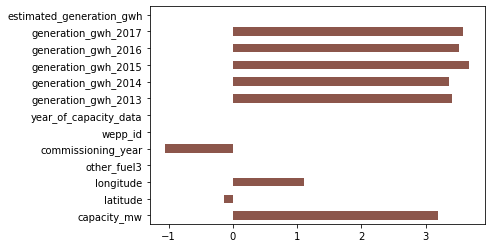

In [610]:
print(df.skew())
df.skew().plot(kind='barh',color='#8c564b')

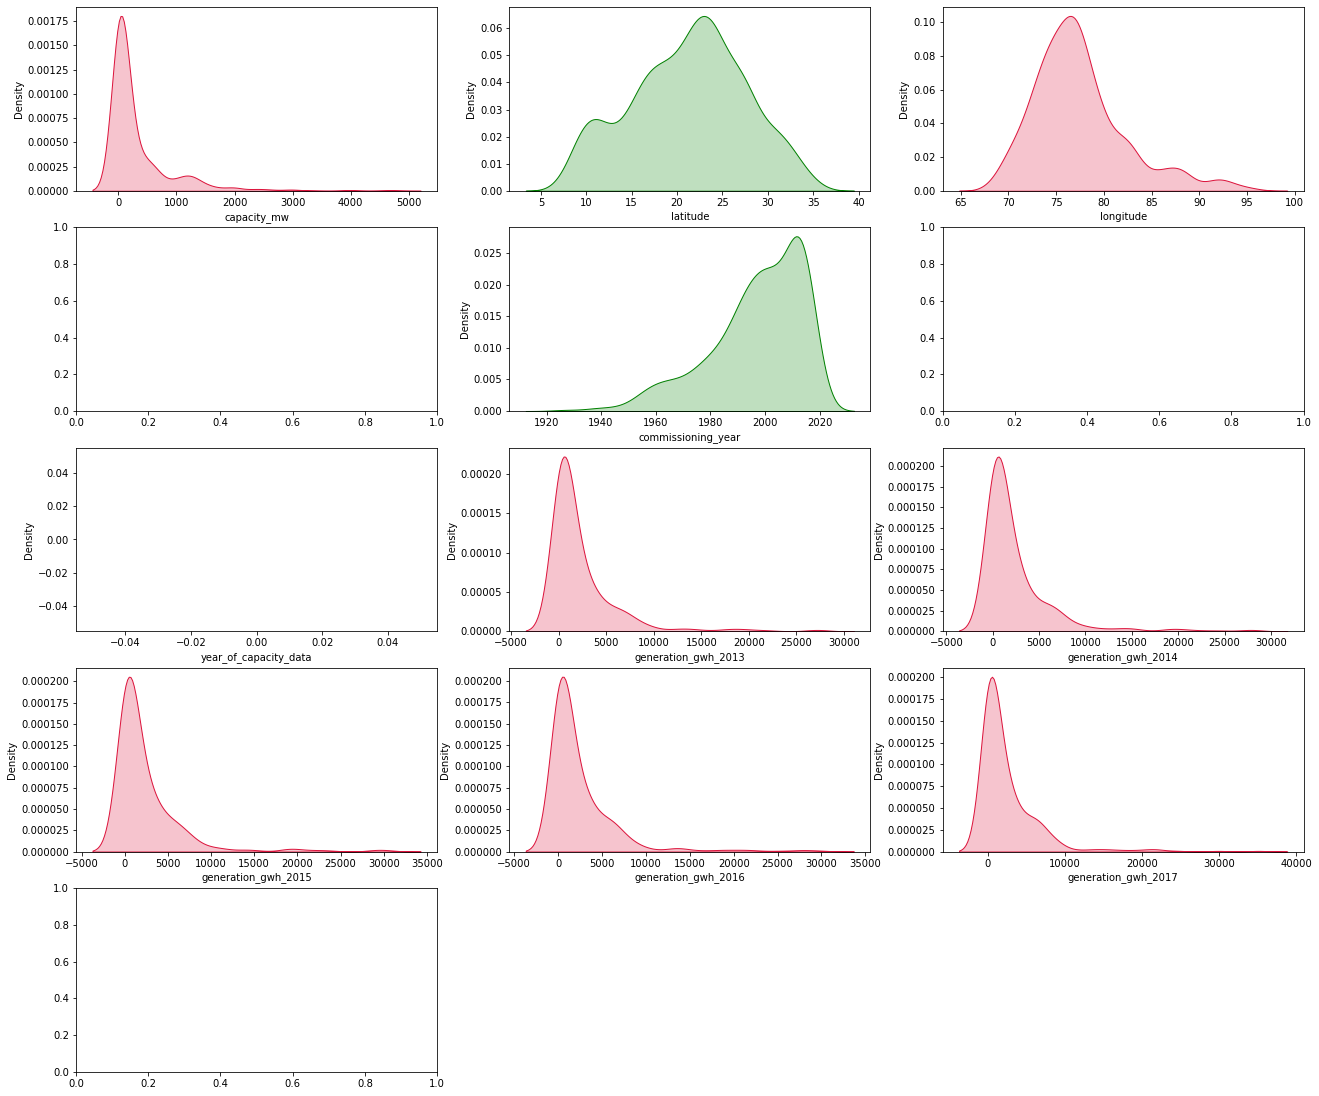

In [611]:
#Visualization of Skewness
plt.figure(figsize=(22,52))
plt.subplot(13,3,1)
sns.kdeplot(df['capacity_mw'],color='crimson',shade=True)
plt.subplot(13,3,2)
sns.kdeplot(df['latitude'],color='green',shade=True)
plt.subplot(13,3,3)
sns.kdeplot(df['longitude'],color='crimson',shade=True)
plt.subplot(13,3,4)
sns.kdeplot(df['other_fuel3'],color='green',shade=True)
plt.subplot(13,3,5)
sns.kdeplot(df['commissioning_year'],color='green',shade=True)
plt.subplot(13,3,6)
sns.kdeplot(df['wepp_id'],color='green',shade=True)
plt.subplot(13,3,7)
sns.kdeplot(df['year_of_capacity_data'],color='green',shade=True)
plt.subplot(13,3,8)
sns.kdeplot(df['generation_gwh_2013'],color='crimson',shade=True)
plt.subplot(13,3,9)
sns.kdeplot(df['generation_gwh_2014'],color='crimson',shade=True)
plt.subplot(13,3,10)
sns.kdeplot(df['generation_gwh_2015'],color='crimson',shade=True)
plt.subplot(13,3,11)
sns.kdeplot(df['generation_gwh_2016'],color='crimson',shade=True)
plt.subplot(13,3,12)
sns.kdeplot(df['generation_gwh_2017'],color='crimson',shade=True)
plt.subplot(13,3,13)
sns.kdeplot(df['estimated_generation_gwh'],color='crimson',shade=True)
plt.show()


*Observation :*<br>*All column are right skewed except logitute and commissioning_year*
<br>*other_fuel3,year_of_capacity_data,wepp_id,estimated_generation_gwh column have no data*

###### Identify Target and Feature Variable

*Predicte-*<br>*1. Fuel Type*<br>
            *2.electrical generating capacity in megawatts*

*Targe Variable (Depaendent Features)* <br>            *-1.capacity_mw*<br>
*-2.primary_fuel,other_fuel1,other_fuel2,other_fuel3*
               
*Predictors (Independent Features)*<br>                 - All variables* 

###### Univariate Analysis

###### 1.capacity_mw variable 
  (electrical generating capacity in megawatts)

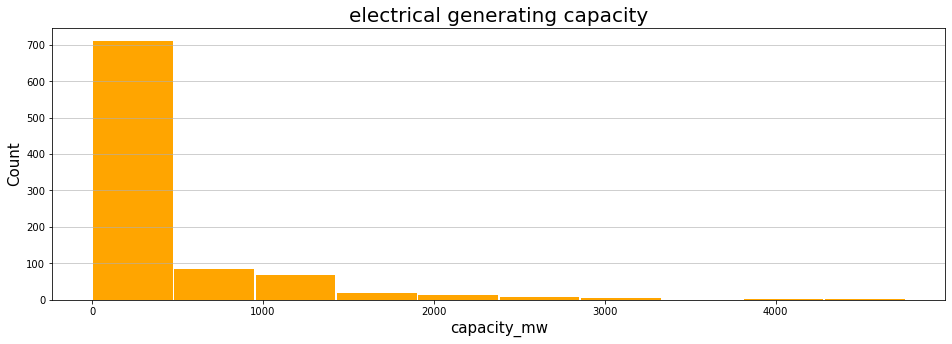

In [612]:
#plt.subplot(111)
#df['capacity_mw'].value_counts().plot(kind='bar', title='Primary Fuel', figsize=(25,4),color='navy')
#sns.lineplot(df['capacity_mw'], height = df['primary_fuel'].unique(),data=df)
#plt.xticks(rotation=90)
#plt.show()

plt.figure(figsize=(16,5))
plt.hist(df['capacity_mw'], rwidth = 0.98,color='orange')
plt.title('electrical generating capacity', fontsize=20)
plt.xlabel('capacity_mw', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.grid(axis='y', alpha=0.75)

*Observation :*<br>*Electrical generating capacity is is max in the range of 0 to 150*

###### 2. Primary_fuel,Other_fuel1,Other_fuel2 Variables
        (Fuel Type)

primary fuel unique values : 8
other fuel1 unique values : 3
other fuel2 unique values : 1


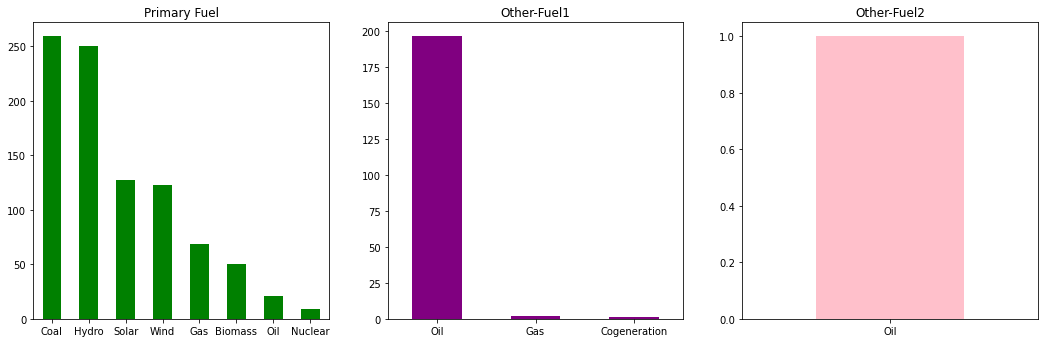

In [613]:
print("primary fuel unique values :",df.primary_fuel.nunique())
print("other fuel1 unique values :",df.other_fuel1.nunique())
print("other fuel2 unique values :",df.other_fuel2.nunique())

plt.subplot(231)
df['primary_fuel'].value_counts().plot(kind='bar', title='Primary Fuel', figsize=(18,12),color='green')
plt.xticks(rotation=0)
plt.subplot(232)
df['other_fuel1'].value_counts().plot(kind='bar', title='Other-Fuel1',figsize=(18,12),color='purple')
plt.xticks(rotation=0)
plt.subplot(233)
df['other_fuel2'].value_counts().plot(kind='bar', title='Other-Fuel2',figsize=(18,12),color='pink')
plt.xticks(rotation=0)
plt.show()

*Observation :*<br> *Column primary_fuel shows that the coal AND Hydro is used max and nuclear is used less*
*column other_fuel1,other_fuel2 show that oil is used max other are used least or not used*
*Because they all are fuel so they can be merge as one column Fuel Type.*

###### 3.generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017 Variables
(electricity generation in gigawatt-hours)

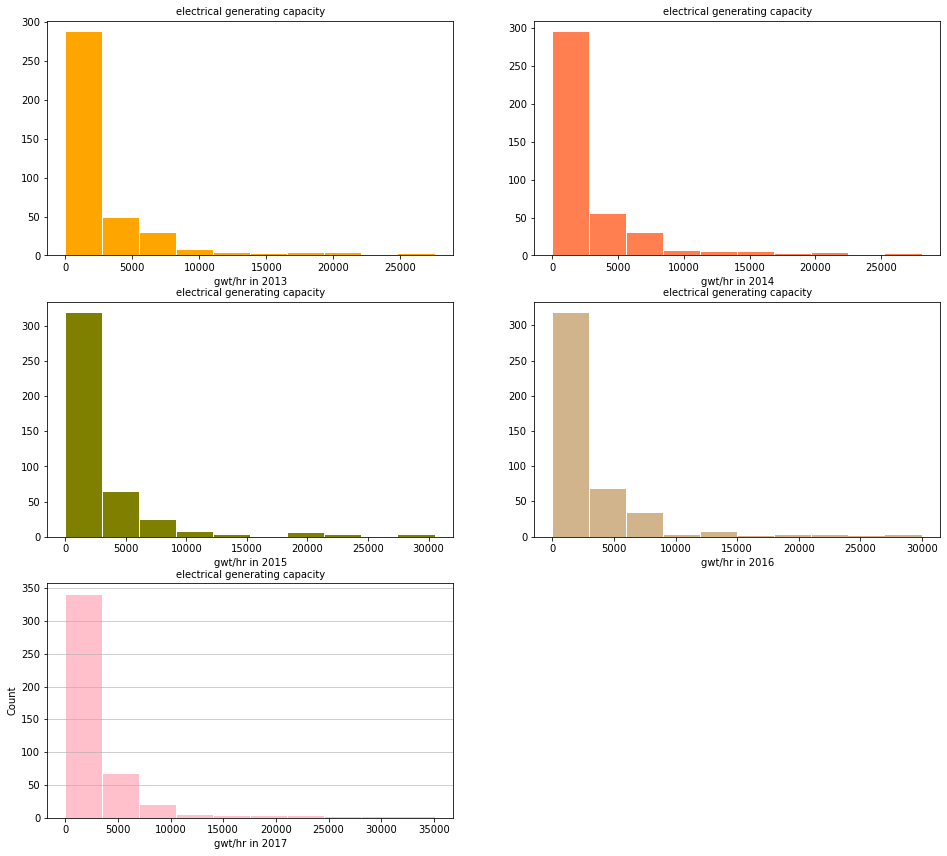

In [614]:
plt.figure(figsize=(16,25))
plt.subplot(5,2,1)
plt.hist(df['generation_gwh_2013'], rwidth = 0.98,color='orange')
plt.title('electrical generating capacity', fontsize=10)
plt.xlabel('gwt/hr in 2013', fontsize=10)
plt.subplot(5,2,2)
plt.hist(df['generation_gwh_2014'], rwidth = 0.98,color='coral')
plt.title('electrical generating capacity', fontsize=10)
plt.xlabel('gwt/hr in 2014', fontsize=10)
plt.subplot(5,2,3)
plt.hist(df['generation_gwh_2015'], rwidth = 0.98,color='olive')
plt.title('electrical generating capacity', fontsize=10)
plt.xlabel('gwt/hr in 2015', fontsize=10)
plt.subplot(5,2,4)
plt.hist(df['generation_gwh_2016'], rwidth = 0.98,color='tan')
plt.title('electrical generating capacity', fontsize=10)
plt.xlabel('gwt/hr in 2016', fontsize=10)
plt.subplot(5,2,5)
plt.hist(df['generation_gwh_2017'], rwidth = 0.98,color='pink')
plt.title('electrical generating capacity', fontsize=10)
plt.xlabel('gwt/hr in 2017', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.grid(axis='y', alpha=0.75)


*Observation :*<br>*In all year electrical generating capacity in gwt/hr is high in the range of 0 to 700*

###### 4. latitude,longitude variable

Latitute unique values : 837
Longitude unique values : 828


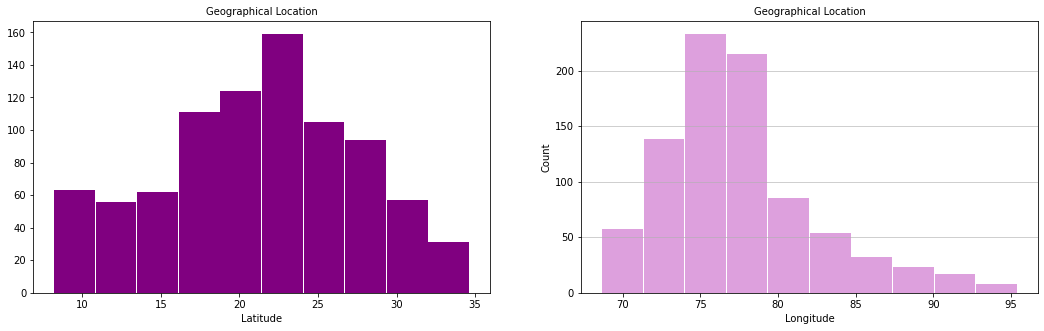

In [615]:
print("Latitute unique values :",df.latitude.nunique())
print("Longitude unique values :",df.longitude.nunique())

plt.figure(figsize=(18,11))
plt.subplot(2,2,1)
plt.hist(df['latitude'], rwidth = 0.98,color='Purple')
plt.title('Geographical Location', fontsize=10)
plt.xlabel('Latitude', fontsize=10)
plt.subplot(2,2,2)
plt.hist(df['longitude'], rwidth = 0.98,color='plum')
plt.title('Geographical Location', fontsize=10)
plt.xlabel('Longitude', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.grid(axis='y', alpha=0.75)


*Observation :*<br>*Geographical Location Latitute is high between the range 16 to 29*<br>
*Geographical Location Longitute is high between the range 72 to 77*

###### 5.country,country_long,geolocation_source variable

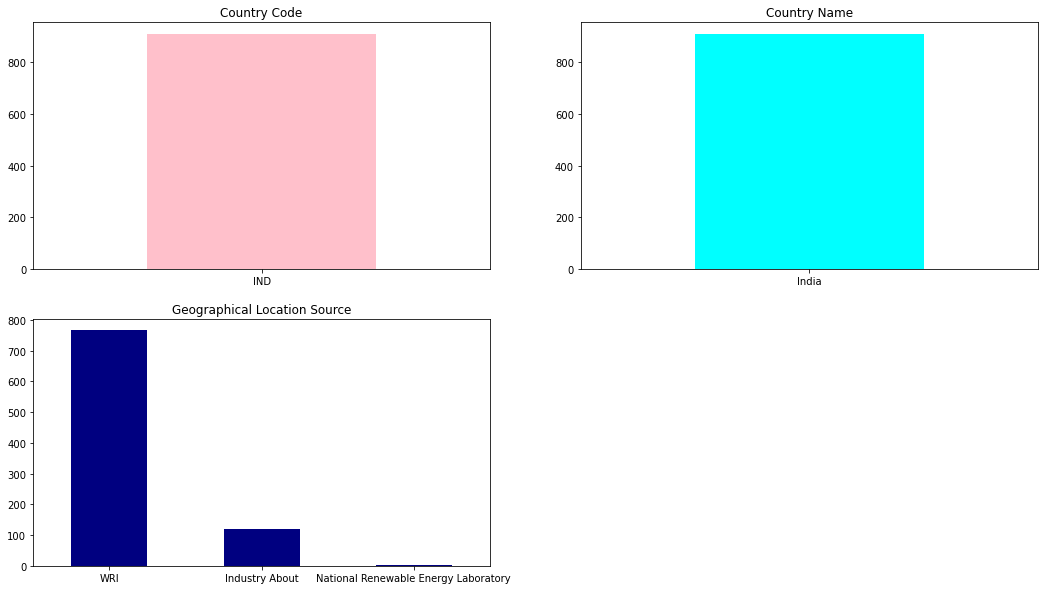

In [616]:
plt.subplot(221)
df['country'].value_counts().plot(kind='bar', title='Country Code', figsize=(18,10),color='pink')
plt.xticks(rotation=0)
plt.subplot(222)
df['country_long'].value_counts().plot(kind='bar', title='Country Name',figsize=(18,10),color='aqua')
plt.xticks(rotation=0)
plt.subplot(223)
df['geolocation_source'].value_counts().plot(kind='bar', title='Geographical Location Source',figsize=(18,10),color='navy')
plt.xticks(rotation=0)
plt.show()


*Observation*<br>*column country and country_long show the same value by name and code*<br>
*both have only one value,from them one can be dropedor both can be droped or they can be merge in the geolocation_source*<br>
*column geolocation_source show the type of power plant and WRI have the high frequency but NREL have least*

###### 6. commissioning_year,year_of_capacity_data variables

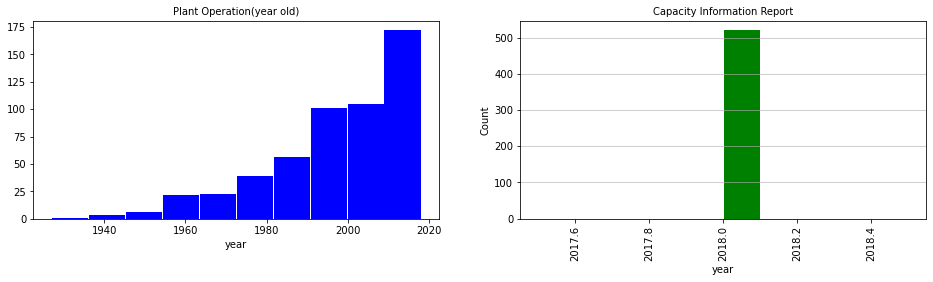

In [617]:
plt.figure(figsize=(16,8))
plt.subplot(221)
plt.hist(df['commissioning_year'], rwidth = 0.98,color='blue')
plt.title('Plant Operation(year old)', fontsize=10)
plt.xlabel('year', fontsize=10)
plt.subplot(222)
plt.hist(df['year_of_capacity_data'], rwidth = 0.98,color='green')
plt.title('Capacity Information Report', fontsize=10)
plt.xlabel('year', fontsize=10)

plt.ylabel('Count', fontsize=10)
plt.grid(axis='y', alpha=0.75)
plt.xticks(rotation=90)
plt.show()



*Observation :*<br>*its shows that from 1990 2020 plant is more opertional*<br>*but in 2020 it is the maximum opertional*
<br>*Capacity Information Report is of the year 2018 only*

###### 7. source,generation_data_source,url variables

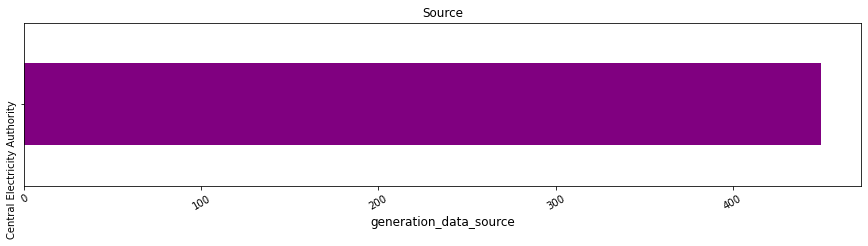

In [618]:
df['generation_data_source'].value_counts().plot(kind='barh', title='Source',figsize=(15,3),color='purple')
plt.xticks(rotation=30)
plt.yticks(rotation=90)
plt.xlabel('generation_data_source',fontsize=12)
plt.show()

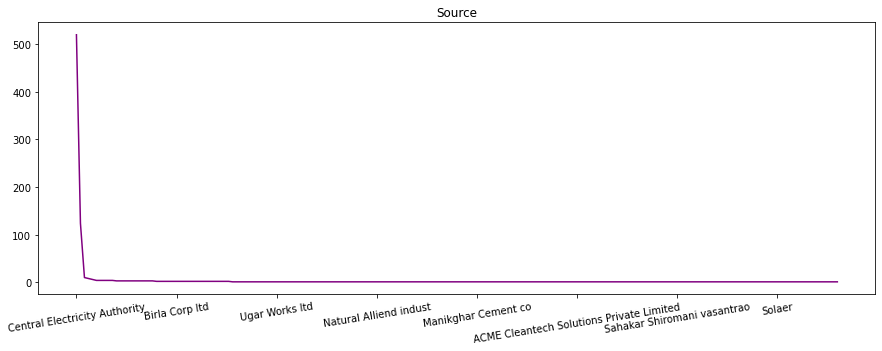

In [619]:
df['source'].value_counts().plot(kind='line', title='Source',figsize=(15,5),color='purple')
plt.xticks(rotation=9)
plt.show()

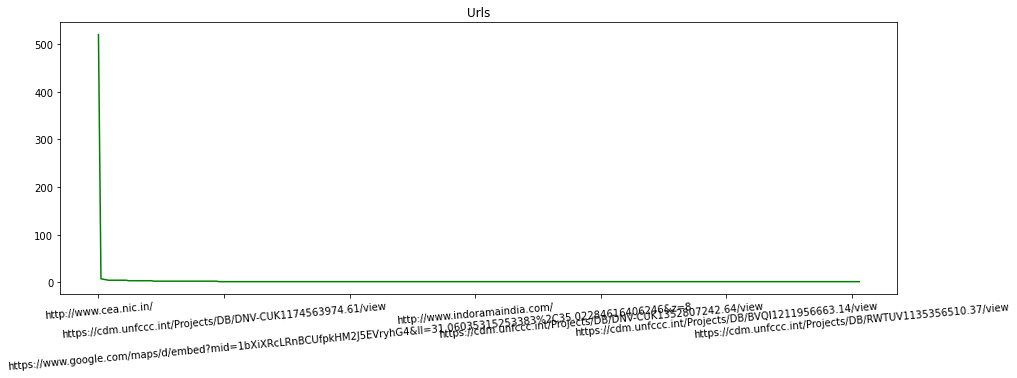

In [620]:
df['url'].value_counts().plot(kind='line', title='Urls',figsize=(15,5),color='green')
plt.xticks(rotation=5)
plt.show()

*Observation :*<br>*column generation_data_source shows that there is only one Electrical generation Information data source CEA*
<br>*column source shows that CEA is the highest reporting authority*
<br>*In column url CEA urls has highest value*

###### 8. name,gppd_idnr,owner variables

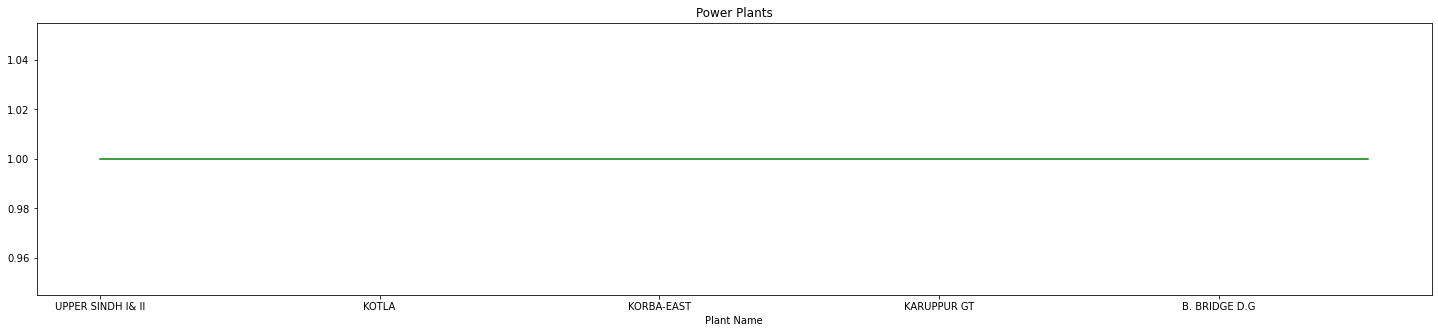

In [621]:
plt.figure(figsize=(30,10))
df['name'].value_counts().plot(kind='line', title='Power Plants', figsize=(25,5),color='green')
plt.xticks(rotation=0)
plt.xlabel('Plant Name', fontsize=10)
plt.show()

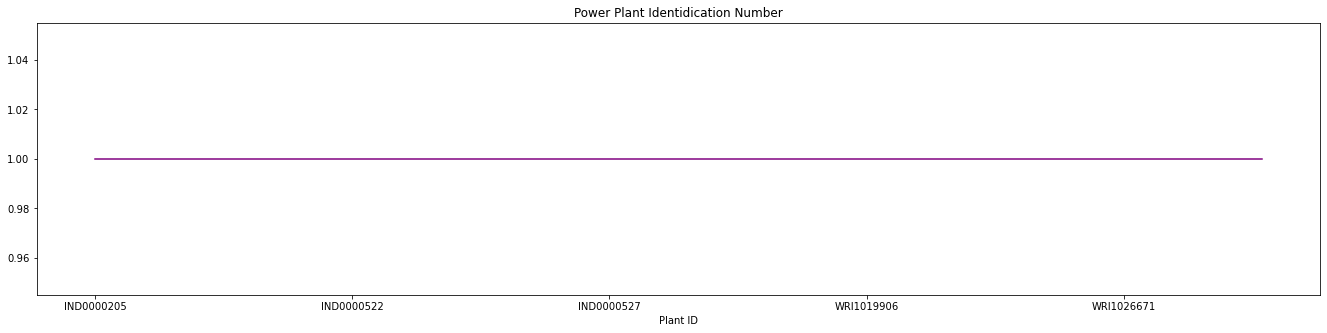

In [622]:
df['gppd_idnr'].value_counts().plot(kind='line', title='Power Plant Identidication Number',figsize=(23,5),color='purple')
plt.xticks(rotation=0)
plt.xlabel('Plant ID', fontsize=10)
plt.show()

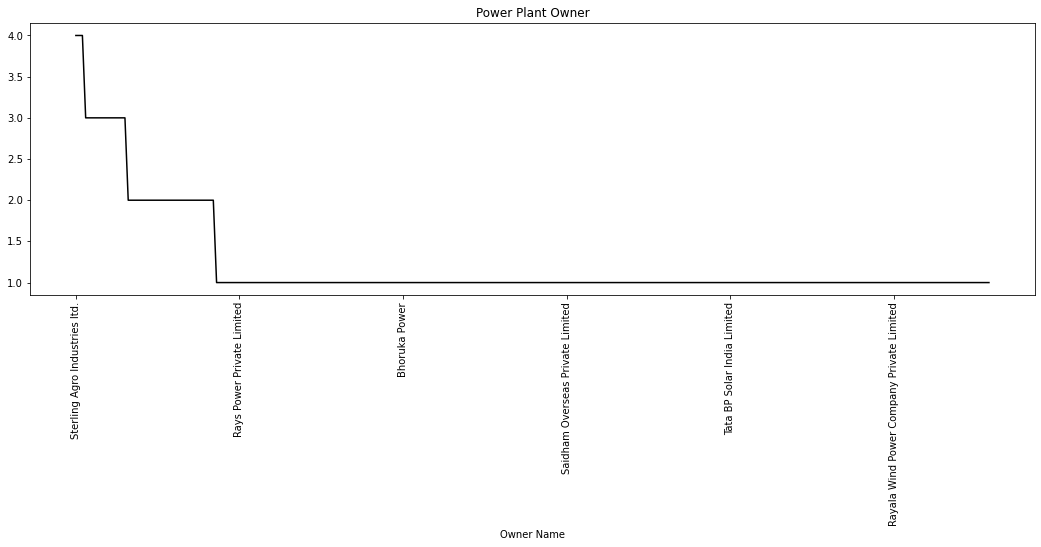

In [623]:
df['owner'].value_counts().plot(kind='line', title='Power Plant Owner',figsize=(18,5),color='black')
plt.xticks(rotation=90)
plt.xlabel('Owner Name', fontsize=10)
plt.show()

*Observation :*<br>*column owner shows Major sharholder is JK cements.*<br>
*column name,gppd_idnr are Power Plant Name and ID number they are just same Need to drop one*

###### Handling unwanted columns

In [624]:
df.drop(['other_fuel3','estimated_generation_gwh','year_of_capacity_data','wepp_id'],inplace=True,axis=1 )

In [625]:
df.shape

(908, 21)

###### Handling Outliers

###### Removing Outliers

In [626]:
fout =['capacity_mw','longitude','commissioning_year','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']
for f in fout:
    q1 = df[f].quantile(0.25)
    q3 = df[f].quantile(0.75)
    IQR = q3-q1
    lolimit = q1 - (IQR*1.5)
    uplimit = q3 + (IQR*1.5)
    df.loc[df[f]<lolimit,f] = lolimit
    df.loc[df[f]>uplimit,f] = uplimit

###### Recheck for Outiliers

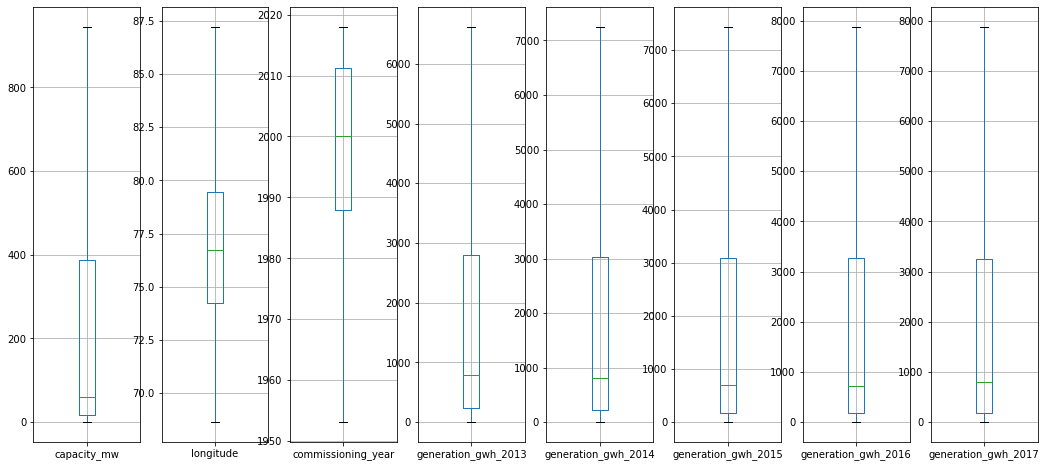

In [627]:
fig, pltcan=plt.subplots(nrows=1, ncols=len(fout), figsize=(18,8))
for predcol , i in zip(fout, range(len(fout))):
    df.boxplot(column=predcol, figsize=(2,10), vert=True, ax=pltcan[i])   

*Observation :*<br>*outliers removed*

###### Removing Skewness

In [628]:
df.skew()

capacity_mw            1.306045
latitude              -0.143622
longitude              0.644550
commissioning_year    -0.900658
generation_gwh_2013    1.211203
generation_gwh_2014    1.239892
generation_gwh_2015    1.230406
generation_gwh_2016    1.236953
generation_gwh_2017    1.174575
dtype: float64

In [629]:
df[['capacity_mw']]= np.cbrt(df[['capacity_mw']])
df[['latitude']]= np.cbrt(df[['latitude']])
df[['longitude']]= np.cbrt(df[['longitude']])
df[['commissioning_year']]= np.cbrt(df[['commissioning_year']])
df[['generation_gwh_2013']]= np.cbrt(df[['generation_gwh_2013']])
df[['generation_gwh_2014']]= np.cbrt(df[['generation_gwh_2014']])
df[['generation_gwh_2015']]= np.cbrt(df[['generation_gwh_2015']])
df[['generation_gwh_2016']]= np.cbrt(df[['generation_gwh_2016']])
df[['generation_gwh_2017']]= np.cbrt(df[['generation_gwh_2017']])


In [630]:
df.skew()

capacity_mw            0.604750
latitude              -0.570070
longitude              0.556528
commissioning_year    -0.910998
generation_gwh_2013    0.097729
generation_gwh_2014    0.081938
generation_gwh_2015    0.130711
generation_gwh_2016    0.136389
generation_gwh_2017    0.103771
dtype: float64

###### Handling Zero values in Columns

In [632]:
print('Total zeros in Dataset:', df[df==0].count().sum())

Total zeros in Dataset: 142


In [633]:
print("capacity_mw median value   :",df['capacity_mw'].median())
print("generation_gwh year 2013 median value :",df['generation_gwh_2013'].median())
print("generation_gwh year 2014 median value :",df['generation_gwh_2014'].median())
print("generation_gwh year 2015 median value :",df['generation_gwh_2015'].median())
print("generation_gwh year 2016 median value :",df['generation_gwh_2016'].median())
print("generation_gwh year 2017 median value :",df['generation_gwh_2017'].median())

capacity_mw median value   : 3.9148676411688634
generation_gwh year 2013 median value : 9.271720698173405
generation_gwh year 2014 median value : 9.305404035386694
generation_gwh year 2015 median value : 8.88338122495253
generation_gwh year 2016 median value : 8.949213334517498
generation_gwh year 2017 median value : 9.312488329339907


In [634]:
df['capacity_mw'].replace(0,60,inplace=True)
df['generation_gwh_2013'].replace(0,797.06,inplace=True)
df['generation_gwh_2014'].replace(0,805.76,inplace=True)
df['generation_gwh_2015'].replace(0,701.03,inplace=True)
df['generation_gwh_2016'].replace(0,716.73,inplace=True)
df['generation_gwh_2017'].replace(0,807.60,inplace=True)
df['capacity_mw'].replace(0,60,inplace=True)

In [635]:
#recheck for zero values

In [636]:
print('Total zeros in Dataset:', df[df==0].count().sum())

Total zeros in Dataset: 0


###### Handling Missing Values

In [638]:
df['generation_gwh_2013'].fillna(df['generation_gwh_2013'].median(), inplace=True)
df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].median(), inplace=True)
df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].median(), inplace=True)
df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].median(), inplace=True)
df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].median(), inplace=True)

In [639]:
df['gppd_id'] = df['gppd_idnr'].str.replace('([A-Z]+)', '')
df['GLS'] = df['gppd_idnr'].str.extract('([A-Z]+)')
df.drop(['geolocation_source','gppd_idnr'],inplace=True,axis=1)

In [640]:
df.drop(['generation_data_source','other_fuel1','other_fuel2','owner'],inplace=True,axis=1 )

In [641]:
df.drop(df[df['latitude'].isnull()].index,inplace=True,axis=0)

In [642]:
df.drop(['commissioning_year'],inplace=True,axis=1 )


In [643]:
df.shape

(862, 16)

In [644]:
print("Total % of Missing Values in Columns :")
df.isnull().sum()/df.shape[0]*100 

Total % of Missing Values in Columns :


country                0.0
country_long           0.0
name                   0.0
capacity_mw            0.0
latitude               0.0
longitude              0.0
primary_fuel           0.0
source                 0.0
url                    0.0
generation_gwh_2013    0.0
generation_gwh_2014    0.0
generation_gwh_2015    0.0
generation_gwh_2016    0.0
generation_gwh_2017    0.0
gppd_id                0.0
GLS                    0.0
dtype: float64

###### Encoding Categorical Variables

In [645]:
le=LabelEncoder()
df['country']=le.fit_transform(df['country'])
df['primary_fuel']=le.fit_transform(df['primary_fuel'])
df['GLS']=le.fit_transform(df['GLS'])
df['gppd_id']=le.fit_transform(df['GLS'])
df['source']=le.fit_transform(df['source'])
df['url']=le.fit_transform(df['url'])
df['name']=le.fit_transform(df['name'])

#print(df['type'])

In [646]:
df.drop('country_long',inplace=True,axis=1)

In [647]:
df.head()

,country,name,capacity_mw,latitude,longitude,primary_fuel,source,url,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,gppd_id,GLS
0,0,0,1.357209,3.043222,4.183928,6,109,126,10.148441,10.638731,10.458686,10.751350,10.997153,1,1
1,0,1,4.610436,2.914878,4.209822,1,174,169,10.148441,10.638731,10.458686,10.751350,10.997153,1,1
2,0,2,3.396999,2.797949,4.108947,7,21,196,10.148441,10.638731,10.458686,10.751350,10.997153,1,1
3,0,3,5.129928,2.879330,4.434699,2,22,58,8.580676,8.516872,9.449397,9.604586,8.723154,0,0
4,0,4,9.813394,2.800353,4.351694,1,22,58,11.860159,14.479241,18.086385,18.413278,17.528476,0,0


###### Feature Selection

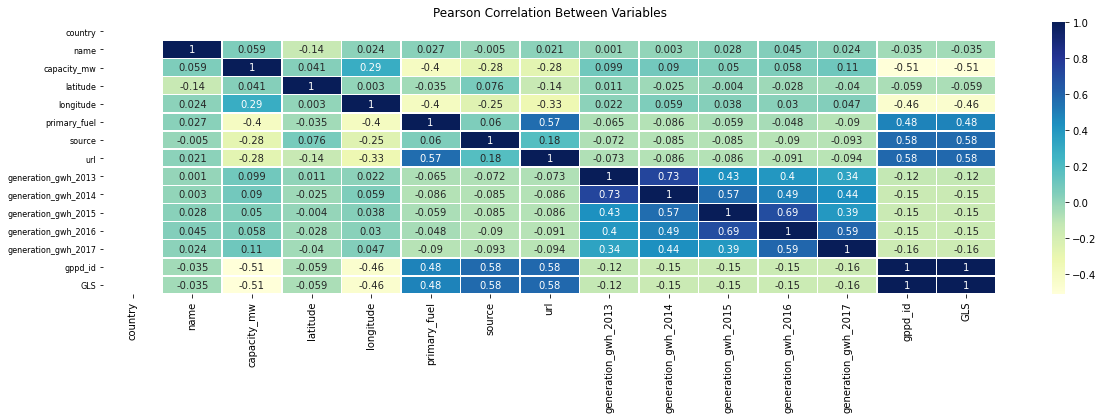

In [648]:
# Variable Correlation
pcorrel = df.corr(method='pearson').round(3)
plt.figure(figsize=(20,5)) 
sns.heatmap(pcorrel,xticklabels=pcorrel.columns,yticklabels=pcorrel.columns,cmap="YlGnBu",annot=True,linewidth=0.5)
plt.title("Pearson Correlation Between Variables")
plt.xticks(fontsize=10)
plt.yticks(fontsize=8)
plt.show()        
    

In [655]:
# Anova Test 
sp=[]
for i in df.columns:
    cg=df.groupby(['capacity_mw','primary_fuel'])[i].apply(list)
    av=stats.f_oneway(*cg)
    if av[1]<0.5:
        print(i,'------correlated------:',av[1],'\n')
        sp.append(i)
    else:
        print(i,'------not correlated-----:',av[1],'\n')


country ------not correlated-----: nan 

name ------not correlated-----: 0.7032546720803051 

capacity_mw ------correlated------: 0.0 

latitude ------correlated------: 3.779960721376309e-06 

longitude ------correlated------: 6.245178225318219e-07 

primary_fuel ------correlated------: 0.0 

source ------correlated------: 1.527845041488733e-40 

url ------correlated------: 4.498250200634588e-73 

generation_gwh_2013 ------correlated------: 2.294302569499304e-16 

generation_gwh_2014 ------correlated------: 4.882113887298754e-07 

generation_gwh_2015 ------correlated------: 1.096811711648606e-16 

generation_gwh_2016 ------correlated------: 1.2786244653603687e-47 

generation_gwh_2017 ------correlated------: 1.2443385583275009e-43 

gppd_id ------correlated------: 1.7528067745243456e-209 

GLS ------correlated------: 1.7528067745243456e-209 



In [656]:
df.drop(['country','name'],inplace=True,axis=1)

###### split target and feature variables

In [658]:
y_train=df[['capacity_mw','primary_fuel']]
X_train=df.drop(['capacity_mw','primary_fuel'],axis=1)

print("y_train :",y_train.shape)
print("X_train :",X_train.shape)

y_train : (862, 2)
X_train : (862, 11)


In [659]:
#selected features

In [660]:
X_train.columns

Index(['latitude', 'longitude', 'source', 'url', 'generation_gwh_2013',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'gppd_id', 'GLS'],
      dtype='object')

In [661]:
y_train.columns

Index(['capacity_mw', 'primary_fuel'], dtype='object')

###### Normilization of data

In [662]:
from sklearn.preprocessing import power_transform
X=power_transform(X_train,method='yeo-johnson')
X

array([[ 1.12529088, -0.93785077,  1.55152241, ...,  0.06977445,
         1.15587342,  1.15587342],
       [ 0.56301327, -0.54506491,  2.00622411, ...,  0.06977445,
         1.15587342,  1.15587342],
       [ 0.09873253, -2.24976514, -0.48050736, ...,  0.06977445,
         1.15587342,  1.15587342],
       ...,
       [-0.95179474, -0.28534602, -0.48050736, ...,  0.06977445,
         1.15587342,  1.15587342],
       [ 0.49510821, -0.78843068,  0.87647901, ...,  0.06977445,
         1.15587342,  1.15587342],
       [-1.77276836,  0.17944163, -0.48050736, ...,  0.06977445,
         1.15587342,  1.15587342]])

###### Splitting Dataset into train and test set

In [664]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y_train, test_size = 0.25, random_state = 44)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(646, 11)
(646, 2)
(216, 11)
(216, 2)


###### Sandardization of data

In [665]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
print(x_train)
x_test = sc.fit_transform(x_test)
print(x_test)

[[-0.50032311 -0.68496083 -0.39607375 ...  0.06409018 -0.8609529
  -0.8609529 ]
 [ 2.16932282 -0.56595257 -0.39607375 ... -0.56749983 -0.8609529
  -0.8609529 ]
 [ 1.92759821 -0.14740842 -0.39607375 ... -0.38085617 -0.8609529
  -0.8609529 ]
 ...
 [ 0.86330295  1.87482757 -0.39607375 ... -1.49077051 -0.8609529
  -0.8609529 ]
 [ 1.42629555 -0.33414179 -0.21982653 ...  0.06409018  1.16150373
   1.16150373]
 [-0.33143598 -0.48073265 -0.46126491 ...  0.06409018  1.16150373
   1.16150373]]
[[-0.08479819  0.62049772  2.20279613 ...  0.08566725  1.139242
   1.139242  ]
 [ 0.17768688  1.29023481 -0.47542177 ... -1.13949148 -0.87777662
  -0.87777662]
 [-0.24995455 -0.70399192  1.91969174 ...  0.08566725  1.139242
   1.139242  ]
 ...
 [ 0.30905108  2.03118315 -0.47542177 ... -0.31944964 -0.87777662
  -0.87777662]
 [ 1.68458593  0.04539884 -0.47542177 ... -0.46439419 -0.87777662
  -0.87777662]
 [-0.25560111 -1.14774835 -0.47542177 ...  0.8211549  -0.87777662
  -0.87777662]]


###### Model Building

In [767]:
#Linear Regression

In [768]:
LRregressor = LinearRegression()
LRregressor.fit(x_train, y_train)
LRy_pred = LRregressor.predict(x_test)
print(LRy_pred[0])

[3.57002699 3.54090794]


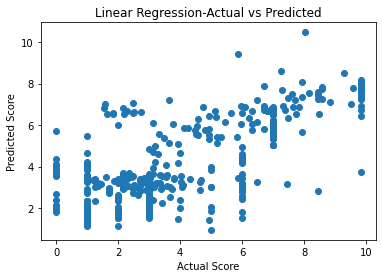

In [769]:
plt.scatter(y_test,LRy_pred)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Linear Regression-Actual vs Predicted')
plt.show()


In [770]:
#Evaluation

In [771]:
# Calculating R2 Score
LRr2_score_train =LRregressor.score(x_train, y_train)
print('\nr2 Score On Train Data:',LRr2_score_train)
LRr2_score_test=LRregressor.score(x_test,y_test)
print('\nr2 Score On Test Data:',LRr2_score_test)

print('\n\nMean Absolute Error:', metrics.mean_absolute_error(y_test, LRy_pred))
print('\nMean Squared Error:', metrics.mean_squared_error(y_test, LRy_pred))
print('\nRoot Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, LRy_pred)))



r2 Score On Train Data: 0.3818656978856339

r2 Score On Test Data: 0.46873826158104775


Mean Absolute Error: 1.3518233725543802

Mean Squared Error: 3.227497107991753

Root Mean Squared Error: 1.796523617432221


In [772]:
#Validation

In [773]:
LRscores = cross_val_score(LRregressor,x_train, y_train, cv=5)
print('\nCross Validation')
print('Linear Regression Score:',LRscores)
LRcross=round(LRscores.mean(),4)
print('Average LinearRegression score:',LRcross)


Cross Validation
Linear Regression Score: [0.35055353 0.49960908 0.24686255 0.54373131 0.43946715]
Average LinearRegression score: 0.416


In [774]:
#Lasso Regressor

In [775]:
LSregressor = Lasso()
LSregressor.fit(x_train, y_train)
LSy_pred = LSregressor.predict(x_test)
print(LSy_pred[0])

[4.16889223 3.38394885]


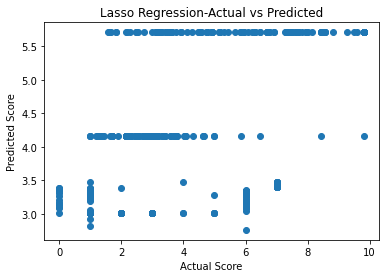

In [776]:
plt.scatter(y_test,LSy_pred)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Lasso Regression-Actual vs Predicted')
plt.show()

In [777]:
#Evaluation

In [778]:
# Calculating R2 Score
LSr2_score_train =LSregressor.score(x_train, y_train)
print('\nr2 Score On Train Data:',LSr2_score_train)
LSr2_score_test=LSregressor.score(x_test,y_test)
print('\nr2 Score On Test Data:',LSr2_score_test)

print('\n\nMean Absolute Error:', metrics.mean_absolute_error(y_test, LSy_pred))
print('\nMean Squared Error:', metrics.mean_squared_error(y_test, LSy_pred))
print('\nRoot Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, LSy_pred)))


r2 Score On Train Data: 0.12494319880253357

r2 Score On Test Data: 0.16703992550951974


Mean Absolute Error: 1.8731535930420002

Mean Squared Error: 5.073137452582433

Root Mean Squared Error: 2.2523626378943584


In [779]:
#validation

In [780]:
LSscores = cross_val_score(LSregressor,x_train, y_train, cv=5)
print('\nCross Validation')
print('Lasso Regression Score:',LSscores)
LScross=round(LSscores.mean(),4)
print('Average Lasso Regression score:',LScross)


Cross Validation
Lasso Regression Score: [0.15199997 0.17078544 0.05705136 0.15867689 0.1543998 ]
Average Lasso Regression score: 0.1386


In [781]:
# DecisionTree Regressor

In [782]:
DTregressor =  DecisionTreeRegressor(max_depth=6,criterion='mse')
DTregressor.fit(x_train, y_train)
DTy_pred = DTregressor.predict(x_test)
print(DTy_pred[0])

[7.3700857  1.33333333]


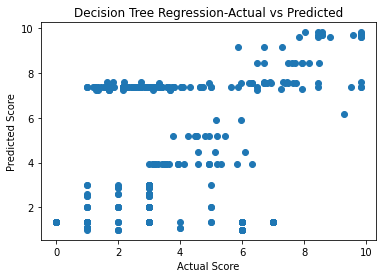

In [783]:
plt.scatter(y_test,DTy_pred)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Decision Tree Regression-Actual vs Predicted')
plt.show()

In [784]:
#Evaluation

In [785]:
# Calculating R2 Score
DTr2_score_train =DTregressor.score(x_train, y_train)
print('\nr2 Score On Train Data:',DTr2_score_train)
DTr2_score_test=DTregressor.score(x_test,y_test)
print('\nr2 Score On Test Data:',DTr2_score_test)

print('\n\nMean Absolute Error:', metrics.mean_absolute_error(y_test,DTy_pred))
print('\nMean Squared Error:', metrics.mean_squared_error(y_test,DTy_pred))
print('\nRoot Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,DTy_pred)))



r2 Score On Train Data: 0.8249114651735142

r2 Score On Test Data: -0.5784560685932751


Mean Absolute Error: 2.2787306611348006

Mean Squared Error: 9.853701733582906

Root Mean Squared Error: 3.139060645094788


In [786]:
#Validation

In [787]:
DTscores = cross_val_score(DTregressor,x_train, y_train, cv=5)
print('\nCross Validation')
print('Decision Tree Regression Score:',DTscores)

DTcross=round(DTscores.mean(),4)
print('Average Decision Tree Regression score:',DTcross)



Cross Validation
Decision Tree Regression Score: [ 0.60251343 -2.328242    0.3842033   0.76794156  0.72131122]
Average Decision Tree Regression score: 0.0295


In [788]:
#RandomForest Regressor

In [789]:
RFregressor = RandomForestRegressor()
RFregressor.fit(x_train, y_train)
RFy_pred = RFregressor.predict(x_test)
print(RFy_pred[0])

[7.60948942 1.7       ]


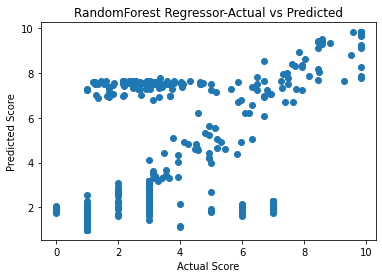

In [790]:
plt.scatter(y_test,RFy_pred)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('RandomForest Regressor-Actual vs Predicted')
plt.show()

In [791]:
#Evaluation

In [792]:
# Calculating R2 Score
RFr2_score_train =RFregressor.score(x_train, y_train)
print('\nr2 Score On Train Data:',RFr2_score_train)
RFr2_score_test=RFregressor.score(x_test,y_test)
print('\nr2 Score On Test Data:',RFr2_score_test)

print('\n\nMean Absolute Error:', metrics.mean_absolute_error(y_test, RFy_pred))
print('\nMean Squared Error:', metrics.mean_squared_error(y_test, RFy_pred))
print('\nRoot Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, RFy_pred)))


r2 Score On Train Data: 0.9300906197874184

r2 Score On Test Data: -0.4206274484222452


Mean Absolute Error: 2.1718989826060318

Mean Squared Error: 9.050120827208215

Root Mean Squared Error: 3.0083418733927525


In [793]:
#validation

In [794]:
RFscores = cross_val_score(RFregressor,x_train, y_train, cv=5)
print('\nCross Validation')
print('Random Forest Regression Score:',RFscores)

RFcross=round(scores.mean(),4)
print('Average Random Forest Regression score:',RFcross)


Cross Validation
Random Forest Regression Score: [0.67042138 0.41770654 0.4337021  0.83327469 0.78944489]
Average Random Forest Regression score: 0.1386


In [795]:
#KNeighbors Regressor

In [796]:
KNNregressor =  KNeighborsRegressor(n_neighbors=2)
KNNregressor.fit(x_train, y_train)
KNNy_pred = KNNregressor.predict(x_test)
print(KNNy_pred[0])

[2.40907335 0.        ]


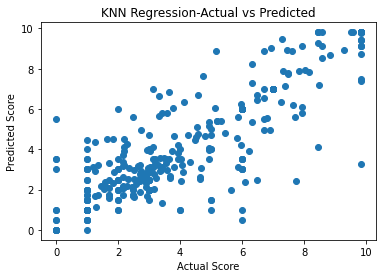

In [797]:
plt.scatter(y_test,KNNy_pred)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('KNN Regression-Actual vs Predicted')
plt.show()

In [798]:
#Evaluation

In [799]:
# Calculating R2 Score
KNNr2_score_train =KNNregressor.score(x_train, y_train)
print('\nr2 Score On Train Data:',KNNr2_score_train)
KNNr2_score_test=KNNregressor.score(x_test,y_test)
print('\nr2 Score On Test Data:',KNNr2_score_test)

print('\n\nMean Absolute Error:', metrics.mean_absolute_error(y_test, KNNy_pred))
print('\nMean Squared Error:', metrics.mean_squared_error(y_test, KNNy_pred))
print('\nRoot Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, KNNy_pred)))


r2 Score On Train Data: 0.8069680399965311

r2 Score On Test Data: 0.7062427974948939


Mean Absolute Error: 0.7829861678478899

Mean Squared Error: 1.819683230390292

Root Mean Squared Error: 1.3489563485859326


In [800]:
#Validation

In [801]:
KNNscores = cross_val_score(KNNregressor,x_train, y_train, cv=5)
print('\nCross Validation')
print('KNN Regression Score:',KNNscores)
KNNcross=round(KNNscores.mean(),4)
print('Average KNN Regression score:',KNNcross)


Cross Validation
KNN Regression Score: [0.55972244 0.24545203 0.2874309  0.69443339 0.5745933 ]
Average KNN Regression score: 0.4723


###### compare Models

In [802]:
trainscore=[LRr2_score_train,LSr2_score_train,DTr2_score_train,RFr2_score_train,KNNr2_score_train]
testscore=[LRr2_score_test,LSr2_score_test,DTr2_score_test,RFr2_score_test,KNNr2_score_test]
VAlscore=[LRcross,LScross,DTcross,RFcross,KNNcross]
col={'Train Score':trainscore,'Test Score':testscore,'Validation':VAlscore}
models=['Linear Regression','Lasso','Decision Tree','Random Forest','KNN']
dfp=pd.DataFrame(data=col,index=models)
dfp

,Train Score,Test Score,Validation
Linear Regression,0.381866,0.468738,0.4160
Lasso,0.124943,0.167040,0.1386
Decision Tree,0.824911,-0.578456,0.0295
Random Forest,0.930091,-0.420627,0.1386
KNN,0.806968,0.706243,0.4723


<AxesSubplot:>

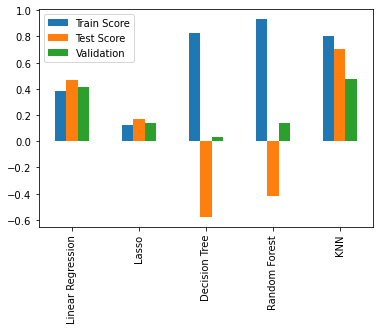

In [803]:
dfp.plot(kind='bar')

###### Hyperparameter Tunining 

In [ ]:
#for Linear Regression

In [804]:
fit_intercept=[True,False]
normalize=[True,False]
copy_X=[True,False]
positive=[True,False]
n_jobs= [1,5,10, 100,200,500]
param_distributions = dict(fit_intercept=fit_intercept,
                           normalize=normalize,
                           copy_X=copy_X,
                           positive=positive,
                           n_jobs= n_jobs)

random = RandomizedSearchCV(estimator=LRregressor,
                            param_distributions=param_distributions,
                            verbose=1, n_jobs=-1,
                            n_iter=1000)
random_result = random.fit(x_train, y_train)

print('Best Score: ', random_result.best_score_)
print('Best Params: ', random_result.best_params_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Score:  0.41604472437028706
Best Params:  {'positive': False, 'normalize': True, 'n_jobs': 1, 'fit_intercept': True, 'copy_X': True}


In [ ]:
#for KNN

In [806]:
n_neighbors= [1,5,4,10,30,15,20,100]
weights=['uniform','distance']
algorithm=['auto','ball_tree','kd_tree','brute']
leaf_size=[1,2,4,6,12,10,25,50]
p=[1,2,5,7,10,20,24]
n_jobs= [1,5,10, 100,200,500]

param_distributions = dict(n_neighbors=n_neighbors,
                           weights=weights,
                           algorithm=algorithm,
                           leaf_size=leaf_size,
                           p=p,
                           n_jobs= n_jobs)

random = RandomizedSearchCV(estimator=KNNregressor,
                            param_distributions=param_distributions,
                            scoring='roc_auc',
                            verbose=1, n_jobs=-1,
                            n_iter=1000)
random_result = random.fit(x_train, y_train)

print('Best Score: ', random_result.best_score_)
print('Best Params: ', random_result.best_params_)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
Best Score:  nan
Best Params:  {'weights': 'uniform', 'p': 2, 'n_neighbors': 10, 'n_jobs': 500, 'leaf_size': 2, 'algorithm': 'auto'}


###### Final MOdel

*Choosing the Linear Regression as Final Model*
<br>*Linear Regression Test Accuray,Train Accuracy and Final Accuracy Score is approx Equal *
<br>*final Accuracy is also higher than other models*
<br>*Best Score after Hyperparameter tuning is also same*

###### REtraining MOdel

In [808]:
y_train=df[['capacity_mw','primary_fuel']]
X_train=df.drop(['capacity_mw','primary_fuel'],axis=1)

In [809]:
PScaler=StandardScaler()
PScalerFit=PScaler.fit(X_train)
x_train=PScalerFit.transform(X_train)
print("x_train :",x_train.shape)
print("y_train :",y_train.shape)

x_train : (862, 11)
y_train : (862, 2)


In [811]:
regressor =LinearRegression(positive=False,normalize=False, n_jobs=1, fit_intercept=True, copy_X=True)
Final_Model=regressor.fit(x_train,y_train)

# Calculating R2 Score
r2_score =regressor.score(x_train, y_train)
print('Final Score:',r2_score)


Final Score: 0.35011236788459144


###### Model Saving

In [812]:
import pickle
filename='GlobalPowerplant.pk1'
pickle.dump(regressor,open(filename,'wb'))
print("Model Saved")

Model Saved
